# Biodata
**Name:** Rivo Raikhan Maulana  
**Student ID:** 1314623055  
**Program:** Statistika 2023 A  

**Repo:** [Sentiment Analysis – 2024 Presidential Campaign](https://github.com/Rivooooo/Sentiment-Analysis/blob/master/sentiment_analysis_2024_presidential_campaign/sentiment_analysis_2024_presidential_campaign.ipynb)


# Initialize

In [1]:
# Clone the Repo
!git clone https://github.com/Rivooooo/Sentiment-Analysis.git

fatal: destination path 'Sentiment-Analysis' already exists and is not an empty directory.


In [2]:
%cd Sentiment-Analysis/sentiment_analysis_2024_presidential_campaign

/content/Sentiment-Analysis/sentiment_analysis_2024_presidential_campaign


In [ ]:
# !pip install -r requirements.txt
# !pip install dvclive

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from dvclive import Live


## Load Data


In [5]:
anies_df = pd.read_csv("dataset/cleaned data/Anies Baswedan.csv")
ganjar_df = pd.read_csv("dataset/cleaned data/Ganjar Pranowo.csv")
prabowo_df = pd.read_csv("dataset/cleaned data/Prabowo Subianto.csv")

## Data Exploration

In [6]:
anies_df = anies_df[['tweet_tokens_stemmed','label']]
ganjar_df = ganjar_df[['tweet_tokens_stemmed','label']]
prabowo_df = prabowo_df[['tweet_tokens_stemmed','label']]

In [7]:
# Display basic information about the datasets
def display_dataset_info(df, name):
    print(f"\n{'='*60}")
    print(f"Dataset: {name}")
    print(f"{'='*60}")
    print(f"Dataset Shape: {df.shape}")
    print(f"\nColumn Names: {df.columns.tolist()}")
    print(f"\nFirst few rows:")
    display(df.head())
    print(f"\nLabel Distribution:")
    print(df['label'].value_counts())
    print(f"\nLabel Distribution (Percentage):")
    print(df['label'].value_counts(normalize=True) * 100)

In [8]:
# Display info for all datasets
for df, name in [(anies_df, "Anies Baswedan"), (ganjar_df, "Ganjar Pranowo"), (prabowo_df, "Prabowo Subianto")]:
    display_dataset_info(df, name)


Dataset: Anies Baswedan
Dataset Shape: (8856, 2)

Column Names: ['tweet_tokens_stemmed', 'label']

First few rows:


,tweet_tokens_stemmed,label
0,"['anies', 'president', 'info']",Positive
1,"['gerindra', 'party', 'politician', 'sandiaga'...",Positive
2,"['mr', 'anies', 'continued', '', 'we', 'will',...",Positive
3,"['may', 'allah', 'swt', 'save', 'the', 'nation...",Positive
4,"['poor', 'chotimah', '', 'uncle', 'anies', '',...",Positive



Label Distribution:
label
Positive    5810
Negative    3043
Name: count, dtype: int64

Label Distribution (Percentage):
label
Positive    65.627471
Negative    34.372529
Name: proportion, dtype: float64

Dataset: Ganjar Pranowo
Dataset Shape: (7836, 2)

Column Names: ['tweet_tokens_stemmed', 'label']

First few rows:


,tweet_tokens_stemmed,label
0,"['ganjar', 'is', 'getting', 'more', 'and', 'mo...",Positive
1,"['ojoo', 'lali', 'yooo', 'who', 'is', 'smart',...",Positive
2,"['smart', 'people', 'support', 'and', 'reward'...",Positive
3,"['we', 'believe', 'that', 'pranowo', 's', 'rew...",Positive
4,"['intelligent', 'people', 'support', 'and', 'r...",Positive



Label Distribution:
label
Positive    6210
Negative    1626
Name: count, dtype: int64

Label Distribution (Percentage):
label
Positive    79.249617
Negative    20.750383
Name: proportion, dtype: float64

Dataset: Prabowo Subianto
Dataset Shape: (6757, 2)

Column Names: ['tweet_tokens_stemmed', 'label']

First few rows:


,tweet_tokens_stemmed,label
0,"['gemira', 'and', 'semeton', 'bal', 'muslims',...",Positive
1,"['fahnoor', 'inismyname', 'that', 's', 'why', ...",Negative
2,"['this', 'time', '', 'jokowi', 's', 'quota', '...",Positive
3,"['happy', 'birthday', 'to', 'kopassus', '', 'm...",Positive
4,"['gerindra', 'badung', 'party', 'held', 'legis...",Negative



Label Distribution:
label
Positive    5013
Negative    1744
Name: count, dtype: int64

Label Distribution (Percentage):
label
Positive    74.189729
Negative    25.810271
Name: proportion, dtype: float64


## Define Analyisis Pipeline function

In [31]:
!pip install gensim

   25l   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/27.9 MB ? eta -:--:--━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/27.9 MB 8.7 MB/s eta 0:00:04━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/27.9 MB 33.8 MB/s eta 0:00:01━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/27.9 MB 92.6 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━ 17.1/27.9 MB 214.9 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 22.5/27.9 MB 173.9 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━ 25.8/27.9 MB 125.4 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 27.9/27.9 MB 97.0 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 27.9/27.9 MB 97.0 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 27.9/27.9 MB 97.0 MB/s eta 0:00:01━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 47.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import ast
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from gensim.models import Word2Vec

# --- 1. Utility Function ---

def convert_tokens_to_text(token_list):
    """
    Convert a list of tokens back to a string for vectorization.
    
    Args:
        token_list: List of tokens or string representation of list
    
    Returns:
        String of space-separated tokens
    """
    if isinstance(token_list, str):
        # If it's a string, try to evaluate it as a list
        try:
            import ast
            token_list = ast.literal_eval(token_list)
        except:
            # If evaluation fails, split by spaces
            token_list = token_list.split()
    elif not isinstance(token_list, list):
        # If it's not a list, convert to string and split
        token_list = str(token_list).split()
    
    # Ensure all elements are strings before joining
    if all(isinstance(t, str) for t in token_list):
        # Join tokens with spaces
        return ' '.join(token_list)
    else:
        # Fallback for mixed types, converting non-strings to strings
        return ' '.join(str(t) for t in token_list)


# --- 2. Preprocessing Function ---

def preprocess_data(df, dataset_name):
    """
    Preprocess the dataset: handle missing labels and convert tokens to text.
    
    Args:
        df: DataFrame with 'tweet_tokens_stemmed' and 'label' columns
        dataset_name: Name of the dataset for logging
    
    Returns:
        Preprocessed DataFrame
    """
    print(f"\n{'='*60}")
    print(f"Preprocessing: {dataset_name}")
    print(f"{'='*60}")
    
    # Create a copy to avoid modifying original
    df_processed = df.copy()
    
    # Check for missing values in label column
    missing_labels = df_processed['label'].isna().sum()
    print(f"Missing labels found: {missing_labels}")
    
    # Drop rows with missing labels
    print(f"Before dropping missing labels: {len(df_processed)} rows")
    df_processed = df_processed.dropna(subset=['label'])
    print(f"After dropping missing labels: {len(df_processed)} rows")
    
    # Convert tokenized lists to text strings
    df_processed['text'] = df_processed['tweet_tokens_stemmed'].apply(convert_tokens_to_text)
    
    # Verify conversion
    print(f"Sample converted text: {df_processed['text'].iloc[0]}")
    
    return df_processed

# --- 3. Word2Vec Feature Engineering Function ---

def create_w2v_features(df_processed, vector_size=100, window=5, min_count=1, workers=4):
    """
    Creates document vectors using a pre-trained Word2Vec model.
    A document vector is the average of its word vectors (Averaging Word Embeddings).
    
    Args:
        df_processed: DataFrame with 'tweet_tokens_stemmed' column (list of tokens).
        vector_size: Dimensionality of the word vectors.
        window: Maximum distance between the current and predicted word within a sentence.
        min_count: Ignores all words with total frequency lower than this.
        workers: Use these many worker threads to train the model.
        
    Returns:
        (np.array, Word2Vec model) of document vectors and the trained model.
    """
    print(f"\n{'='*60}")
    print("Generating Word2Vec Features")
    print(f"{'='*60}")

    # Use the original token lists for W2V training (not the joined text)
    tokenized_sentences = [
        ast.literal_eval(t) if isinstance(t, str) else t
        for t in df_processed['tweet_tokens_stemmed']
    ]

    # Train Word2Vec model
    w2v_model = Word2Vec(
        sentences=tokenized_sentences,
        vector_size=vector_size,
        window=window,
        min_count=min_count,
        workers=workers
    )

    # Function to average word vectors for a document
    def document_vector(tokens, model, size):
        # Filter out words not in the model's vocabulary
        valid_words = [token for token in tokens if token in model.wv]
        if not valid_words:
            return np.zeros(size)
        
        # Calculate the mean vector
        return np.mean(model.wv[valid_words], axis=0)

    # Apply the function to get document vectors
    w2v_features = np.array([
        document_vector(
            ast.literal_eval(tokens) if isinstance(tokens, str) else tokens,
            w2v_model,
            vector_size
        ) for tokens in df_processed['tweet_tokens_stemmed']
    ])
    
    print(f"Word2Vec Feature matrix shape: {w2v_features.shape}")

    return w2v_features, w2v_model


# --- 4. Enhanced Training and Evaluation Function with Word2Vec and Logistic Regression ---

def train_and_evaluate_models(df_processed, dataset_name, test_size=0.2, random_state=42, use_smote=True, w2v_features=None):
    """
    Train and evaluate models with SMOTE and Word2Vec features.
    Uses SVM and Logistic Regression with GridSearchCV for hyperparameter tuning.
    
    Args:
        df_processed: Preprocessed DataFrame
        dataset_name: Name of the dataset
        test_size: Proportion of data for testing
        random_state: Random state for reproducibility
        use_smote: Boolean to enable/disable SMOTE oversampling
        w2v_features: Numpy array of Word2Vec features (required).
    
    Returns:
        Dictionary containing models, predictions, metrics, and data splits
    """
    print(f"\n{'='*60}")
    print(f"Training Models: {dataset_name} (SMOTE: {use_smote}, Features: Word2Vec)")
    print(f"{'='*60}")
    
    # Prepare features and labels - Using Word2Vec features
    if w2v_features is None:
        raise ValueError("Word2Vec features are required. Please generate them first using create_w2v_features().")
    
    X = w2v_features  # Use Word2Vec features (dense numpy array)
    print(f"Using Word2Vec Features. Feature matrix shape: {X.shape}")
    
    y = df_processed['label']
    
    # Encode labels to numeric values (Positive=1, Negative=0)
    label_map = {'Positive': 1, 'Negative': 0}
    y_encoded = y.map(label_map)
    
    print(f"Total samples: {len(X)}")
    print(f"Label distribution before split/SMOTE:")
    print(f"  Positive: {sum(y_encoded == 1)} ({sum(y_encoded == 1)/len(y_encoded)*100:.2f}%)")
    print(f"  Negative: {sum(y_encoded == 0)} ({sum(y_encoded == 0)/len(y_encoded)*100:.2f}%)")
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=test_size, random_state=random_state, stratify=y_encoded
    )
    
    print(f"\nTraining samples: {X_train.shape[0]}")
    print(f"Test samples: {X_test.shape[0]}")

    # --- SMOTE Application ---
    if use_smote:
        print("\nApplying SMOTE to Word2Vec training data...")
        sm = SMOTE(random_state=random_state)
        X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
        print(f"Training samples after SMOTE: {X_train_res.shape[0]}")
        print(f"Label distribution after SMOTE:")
        print(f"  Positive: {sum(y_train_res == 1)} ({sum(y_train_res == 1)/len(y_train_res)*100:.2f}%)")
        print(f"  Negative: {sum(y_train_res == 0)} ({sum(y_train_res == 0)/len(y_train_res)*100:.2f}%)")
        X_train = X_train_res
        y_train = y_train_res
    else:
        print("\nSMOTE is not used.")

    # --- Model Training and Tuning ---

    # 1. SVM Model Tuning (GridSearchCV)
    print("\nStarting SVM Model Tuning (GridSearchCV)...")
    param_grid_svm = {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto', 0.001, 0.01]
    }

    svm_classifier = GridSearchCV(
        SVC(random_state=random_state, probability=True), 
        param_grid_svm, 
        cv=5, 
        scoring='f1_macro', 
        n_jobs=-1, 
        verbose=1
    )
    svm_classifier.fit(X_train, y_train)
    
    # Extract the best model from tuning
    best_svm = svm_classifier.best_estimator_
    print(f"Best SVM parameters: {svm_classifier.best_params_}")
    print(f"Best SVM CV score: {svm_classifier.best_score_:.4f}")
    
    svm_predictions = best_svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, svm_predictions)
    
    # 2. Logistic Regression Model Tuning (GridSearchCV)
    print("\nStarting Logistic Regression Model Tuning (GridSearchCV)...")
    param_grid_lr = {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'max_iter': [1000, 2000]
    }
    
    lr_classifier = GridSearchCV(
        LogisticRegression(random_state=random_state, class_weight='balanced'), 
        param_grid_lr, 
        cv=5, 
        scoring='f1_macro', 
        n_jobs=-1, 
        verbose=1
    )
    lr_classifier.fit(X_train, y_train)
    
    # Extract the best model
    best_lr = lr_classifier.best_estimator_
    print(f"Best Logistic Regression parameters: {lr_classifier.best_params_}")
    print(f"Best Logistic Regression CV score: {lr_classifier.best_score_:.4f}")
    
    lr_predictions = best_lr.predict(X_test)
    lr_accuracy = accuracy_score(y_test, lr_predictions)

    # --- Evaluation ---
    
    # SVM Metrics
    svm_f1_macro = f1_score(y_test, svm_predictions, average='macro')
    svm_f1_weighted = f1_score(y_test, svm_predictions, average='weighted')
    svm_f1_scores = f1_score(y_test, svm_predictions, average=None)
    svm_cm = confusion_matrix(y_test, svm_predictions)
    
    # Logistic Regression Metrics
    lr_f1_macro = f1_score(y_test, lr_predictions, average='macro')
    lr_f1_weighted = f1_score(y_test, lr_predictions, average='weighted')
    lr_f1_scores = f1_score(y_test, lr_predictions, average=None)
    lr_cm = confusion_matrix(y_test, lr_predictions)
    
    print(f"\nSVM Accuracy (Tuned): {svm_accuracy:.4f} ({svm_accuracy*100:.2f}%)")
    print(f"Logistic Regression Accuracy (Tuned): {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")

    # Store results
    results = {
        'dataset_name': dataset_name,
        'svm_model': svm_classifier,  # GridSearchCV object
        'lr_model': lr_classifier,  # GridSearchCV object
        'svm_predictions': svm_predictions,
        'lr_predictions': lr_predictions,
        'y_test': y_test,
        'svm_accuracy': svm_accuracy,
        'lr_accuracy': lr_accuracy,
        'svm_f1_macro': svm_f1_macro,
        'svm_f1_weighted': svm_f1_weighted,
        'svm_f1_negative': svm_f1_scores[0],
        'svm_f1_positive': svm_f1_scores[1],
        'lr_f1_macro': lr_f1_macro,
        'lr_f1_weighted': lr_f1_weighted,
        'lr_f1_negative': lr_f1_scores[0],
        'lr_f1_positive': lr_f1_scores[1],
        'svm_cm': svm_cm,
        'lr_cm': lr_cm,
        'w2v_features_used': True,
        'smote_used': use_smote,
        'svm_best_params': svm_classifier.best_params_,
        'lr_best_params': lr_classifier.best_params_
    }
    
    return results

'\n# Example Data Setup (Uncomment to test)\ndata = {\n    \'tweet_tokens_stemmed\': [[\'great\', \'product\', \'love\', \'it\'], [\'worst\', \'day\', \'ever\'], [\'neutral\', \'statement\'], [\'amazing\', \'work\'], [\'bad\', \'experience\', \'poor\', \'service\'], [\'great\', \'deal\', \'nice\', \'price\']],\n    \'label\': [\'Positive\', \'Negative\', \'Positive\', \'Positive\', \'Negative\', \'Positive\']\n}\ndf = pd.DataFrame(data)\n\n# Preprocess\ndf_processed = preprocess_data(df, "Sample_Dataset")\n\n# Option 1: TF-IDF + SMOTE + Tuning (Traditional approach)\nresults_tfidf = train_and_evaluate_models(\n    df_processed, \n    "TF-IDF_SMOTE_Tuned", \n    use_smote=True\n)\n\n# Option 2: Word2Vec + SMOTE + Tuning (Embedding approach)\nw2v_features, w2v_model = create_w2v_features(df_processed, vector_size=50)\n\nresults_w2v = train_and_evaluate_models(\n    df_processed, \n    "Word2Vec_SMOTE_Tuned", \n    use_smote=True, \n    w2v_features=w2v_features\n)\n'

In [33]:
# Apply preprocessing to all datasets
anies_processed = preprocess_data(anies_df, "Anies Baswedan")
ganjar_processed = preprocess_data(ganjar_df, "Ganjar Pranowo")
prabowo_processed = preprocess_data(prabowo_df, "Prabowo Subianto")


Preprocessing: Anies Baswedan
Missing labels found: 3
Before dropping missing labels: 8856 rows
After dropping missing labels: 8853 rows
Sample converted text: anies president info

Preprocessing: Ganjar Pranowo
Missing labels found: 0
Before dropping missing labels: 7836 rows
After dropping missing labels: 7836 rows
Sample converted text: ganjar is getting more and more support  now support is coming from the city of batu  malang  east java  they have declared themselves as supporters of the president of the republic of indonesia  not only coming from malang district but also from blitar and others 

Preprocessing: Prabowo Subianto
Missing labels found: 0
Before dropping missing labels: 6757 rows
After dropping missing labels: 6757 rows
Sample converted text: gemira and semeton bal muslims declare support for prabowo as president  news updates


# Model Training

In [ ]:
# Generate Word2Vec features for all datasets
print("="*60)
print("Generating Word2Vec Features for All Datasets")
print("="*60)

anies_w2v_features, anies_w2v_model = create_w2v_features(anies_processed, vector_size=100, window=5, min_count=1, workers=4)
ganjar_w2v_features, ganjar_w2v_model = create_w2v_features(ganjar_processed, vector_size=100, window=5, min_count=1, workers=4)
prabowo_w2v_features, prabowo_w2v_model = create_w2v_features(prabowo_processed, vector_size=100, window=5, min_count=1, workers=4)

# Train and evaluate models for all three datasets using Word2Vec features and SMOTE
anies_results = train_and_evaluate_models(anies_processed, "Anies Baswedan", use_smote=True, w2v_features=anies_w2v_features)
ganjar_results = train_and_evaluate_models(ganjar_processed, "Ganjar Pranowo", use_smote=True, w2v_features=ganjar_w2v_features)
prabowo_results = train_and_evaluate_models(prabowo_processed, "Prabowo Subianto", use_smote=True, w2v_features=prabowo_w2v_features)



Training Models: Anies Baswedan (SMOTE: True, Features: TF-IDF)
Using TF-IDF Features. Feature matrix shape: (8853, 5000)


TypeError: sparse array length is ambiguous; use getnnz() or shape[0]

# Evaluation

## Define Evaluation Function

In [ ]:
def print_detailed_results(results):
    """Print detailed classification reports and confusion matrices."""
    print(f"\n{'='*60}")
    print(f"Detailed Results: {results['dataset_name']}")
    print(f"{'='*60}")
    
    print(f"\nSVM Classification Report:")
    print(classification_report(results['y_test'], results['svm_predictions'], 
                              target_names=['Negative', 'Positive']))
    print(f"\nSVM Confusion Matrix:")
    print(results['svm_cm'])
    print(f"\nSVM Best Parameters: {results['svm_best_params']}")
    
    print(f"\nLogistic Regression Classification Report:")
    print(classification_report(results['y_test'], results['lr_predictions'], 
                              target_names=['Negative', 'Positive']))
    print(f"\nLogistic Regression Confusion Matrix:")
    print(results['lr_cm'])
    print(f"\nLogistic Regression Best Parameters: {results['lr_best_params']}")
    
    print(f"\nF1 Scores:")
    print(f"  SVM - Macro: {results['svm_f1_macro']:.4f}, Weighted: {results['svm_f1_weighted']:.4f}")
    print(f"  SVM - Negative: {results['svm_f1_negative']:.4f}, Positive: {results['svm_f1_positive']:.4f}")
    print(f"  LR  - Macro: {results['lr_f1_macro']:.4f}, Weighted: {results['lr_f1_weighted']:.4f}")
    print(f"  LR  - Negative: {results['lr_f1_negative']:.4f}, Positive: {results['lr_f1_positive']:.4f}")

def plot_confusion_matrices(results):
    """Plot confusion matrices for both models."""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # SVM Confusion Matrix
    sns.heatmap(results['svm_cm'], annot=True, fmt='d', cmap='Blues', ax=axes[0],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[0].set_title(f"SVM - {results['dataset_name']}\nF1-Macro: {results['svm_f1_macro']:.4f}", 
                     fontsize=12, fontweight='bold')
    axes[0].set_ylabel('True Label', fontsize=11)
    axes[0].set_xlabel('Predicted Label', fontsize=11)
    
    # Logistic Regression Confusion Matrix
    sns.heatmap(results['lr_cm'], annot=True, fmt='d', cmap='Oranges', ax=axes[1],
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    axes[1].set_title(f"Logistic Regression - {results['dataset_name']}\nF1-Macro: {results['lr_f1_macro']:.4f}", 
                     fontsize=12, fontweight='bold')
    axes[1].set_ylabel('True Label', fontsize=11)
    axes[1].set_xlabel('Predicted Label', fontsize=11)
    
    plt.tight_layout()
    plt.show()

def plot_accuracy_comparison(results):
    """Plot accuracy comparison bar chart."""
    fig, ax = plt.subplots(figsize=(8, 6))
    models = ['SVM', 'Logistic Regression']
    accuracies = [results['svm_f1_macro'], results['lr_f1_macro']]
    colors = ['#3498db', '#e67e22']
    
    bars = ax.bar(models, accuracies, color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax.set_ylabel('F1-Macro', fontsize=12)
    ax.set_title(f'Sentiment Analysis Model Comparison - {results["dataset_name"]}', 
                fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1])
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{acc:.4f}\n({acc*100:.2f}%)',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()

def track_experiments(results, test_size=0.2, random_state=42):
    """
    Logs metrics and parameters using DVCLive for experiment tracking.
    
    Args:
        results: Dictionary returned by train_and_evaluate_models
    """
    dataset_name = results["dataset_name"]

    print(f"\n{'='*60}")
    print(f"Tracking Models with DVCLive: {dataset_name}")
    print(f"{'='*60}")
    
    with Live(f"dvclive_runs/{dataset_name}",save_dvc_exp=True) as live:
        
        # ---- General params ----
        live.log_param("dataset", dataset_name)
        live.log_param("feature_engineering", "Word2Vec")
        live.log_param("vector_size", 100)
        live.log_param("window", 5)
        live.log_param("min_count", 1)
        live.log_param("smote_used", results["smote_used"])
        live.log_param("test_size", test_size)
        live.log_param("random_state", random_state)
        
        # ---- SVM ----
        live.log_param("SVM/C", results["svm_best_params"].get("C", "N/A"))
        live.log_param("SVM/kernel", results["svm_best_params"].get("kernel", "N/A"))
        live.log_param("SVM/gamma", str(results["svm_best_params"].get("gamma", "N/A")))
        live.log_metric("SVM/accuracy", results["svm_accuracy"])
        live.log_metric("SVM/f1_macro", results["svm_f1_macro"])
        live.log_metric("SVM/f1_weighted", results["svm_f1_weighted"])
        live.log_metric("SVM/f1_negative", results["svm_f1_negative"])
        live.log_metric("SVM/f1_positive", results["svm_f1_positive"])
        
        live.next_step()
        
        # ---- Logistic Regression ----
        live.log_param("LR/C", results["lr_best_params"].get("C", "N/A"))
        live.log_param("LR/penalty", results["lr_best_params"].get("penalty", "N/A"))
        live.log_param("LR/solver", results["lr_best_params"].get("solver", "N/A"))
        live.log_param("LR/max_iter", results["lr_best_params"].get("max_iter", "N/A"))
        live.log_metric("LR/accuracy", results["lr_accuracy"])
        live.log_metric("LR/f1_macro", results["lr_f1_macro"])
        live.log_metric("LR/f1_weighted", results["lr_f1_weighted"])
        live.log_metric("LR/f1_negative", results["lr_f1_negative"])
        live.log_metric("LR/f1_positive", results["lr_f1_positive"])
        
        live.next_step()
    
        return results

## Track Experiment

In [23]:
track_experiments(anies_results)
track_experiments(ganjar_results)
track_experiments(prabowo_results)


Tracking Models with DVCLive: Anies Baswedan


	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/metrics.json, .dvc/config, .dvc/.gitignore
	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/metrics.json, .dvc/config, .dvc/.gitignore



Tracking Models with DVCLive: Ganjar Pranowo


	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/metrics.json, .dvc/config, .dvc/.gitignore
	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Prabowo Subianto/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/metrics.json, .dvc/config, .dvc/.gitignore



Tracking Models with DVCLive: Prabowo Subianto


	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/metrics.json, .dvc/config, .dvc/.gitignore
	.dvcignore, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Ganjar Pranowo/metrics.json, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/params.yaml, sentiment_analysis_2024_presidential_campaign/dvclive_runs/Anies Baswedan/metrics.json, .dvc/config, .dvc/.gitignore


{'dataset_name': 'Prabowo Subianto',
 'vectorizer': TfidfVectorizer(max_df=0.95, max_features=5000, min_df=2, ngram_range=(1, 2)),
 'svm_model': SVC(kernel='linear', probability=True, random_state=42),
 'nb_model': MultinomialNB(),
 'svm_predictions': array([1, 0, 1, ..., 1, 1, 1]),
 'nb_predictions': array([1, 1, 1, ..., 1, 1, 1]),
 'y_test': 2824    1
 4198    1
 4843    0
 2262    1
 3959    1
        ..
 2749    1
 2358    1
 5070    1
 1788    1
 4122    1
 Name: label, Length: 1352, dtype: int64,
 'svm_accuracy': 0.8394970414201184,
 'nb_accuracy': 0.783284023668639,
 'svm_f1_macro': 0.7684242597894235,
 'svm_f1_weighted': 0.8304824696512051,
 'svm_f1_negative': np.float64(0.6401326699834162),
 'svm_f1_positive': np.float64(0.8967158495954307),
 'nb_f1_macro': 0.6087526358154856,
 'nb_f1_weighted': 0.7351574283470054,
 'nb_f1_negative': np.float64(0.34743875278396436),
 'nb_f1_positive': np.float64(0.8700665188470067),
 'svm_cm': array([[193, 156],
        [ 61, 942]]),
 'nb_cm':

## Evaluation (Metrics)

In [24]:
# Print detailed results for all datasets
for results in [anies_results, ganjar_results, prabowo_results]:
    print_detailed_results(results)


Detailed Results: Anies Baswedan

SVM Classification Report:
              precision    recall  f1-score   support

    Negative       0.77      0.72      0.74       609
    Positive       0.86      0.89      0.87      1162

    accuracy                           0.83      1771
   macro avg       0.81      0.80      0.81      1771
weighted avg       0.83      0.83      0.83      1771


SVM Confusion Matrix:
[[ 439  170]
 [ 133 1029]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

    Negative       0.74      0.40      0.52       609
    Positive       0.75      0.93      0.83      1162

    accuracy                           0.75      1771
   macro avg       0.74      0.66      0.67      1771
weighted avg       0.75      0.75      0.72      1771


Naive Bayes Confusion Matrix:
[[ 244  365]
 [  85 1077]]

F1 Scores:
  SVM - Macro: 0.8076, Weighted: 0.8276
  SVM - Negative: 0.7434, Positive: 0.8717
  NB  - Macro: 0.6737, Weighted: 0.7216
  NB 

## Evaluation Visualizations

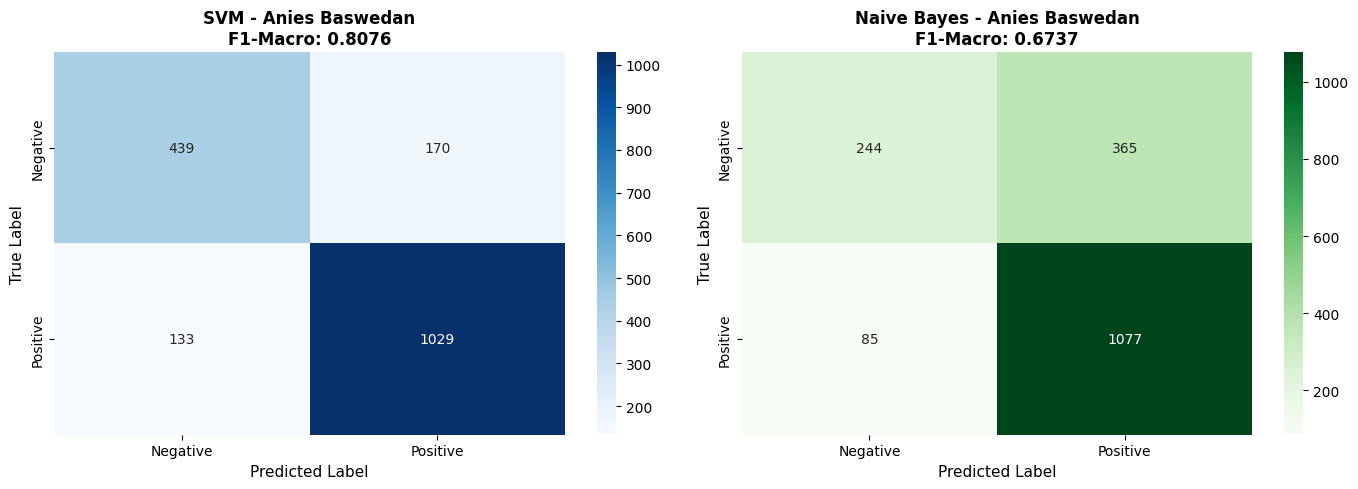

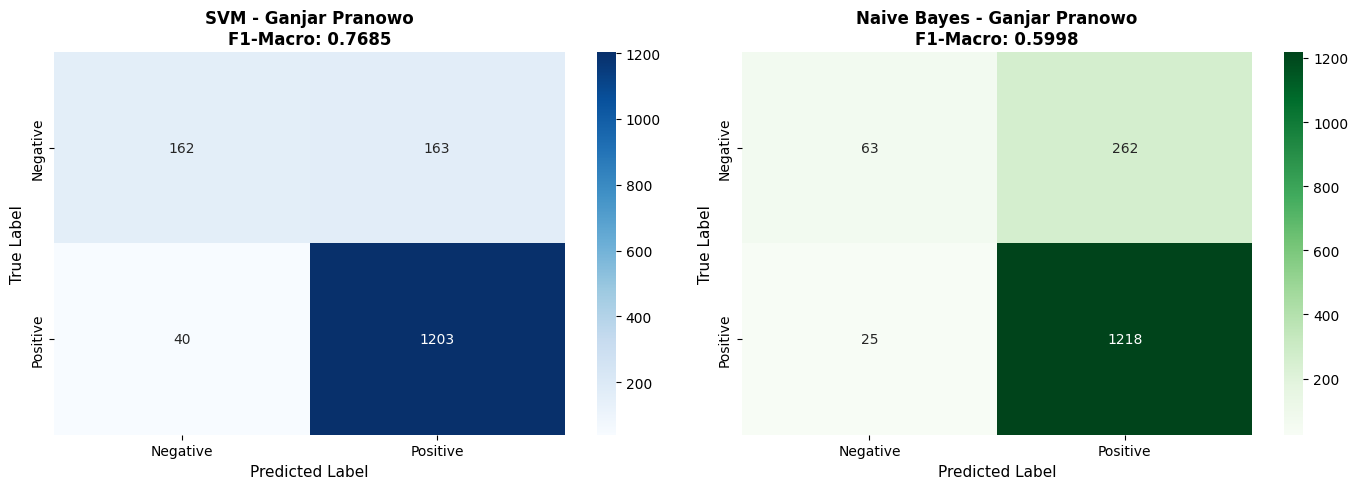

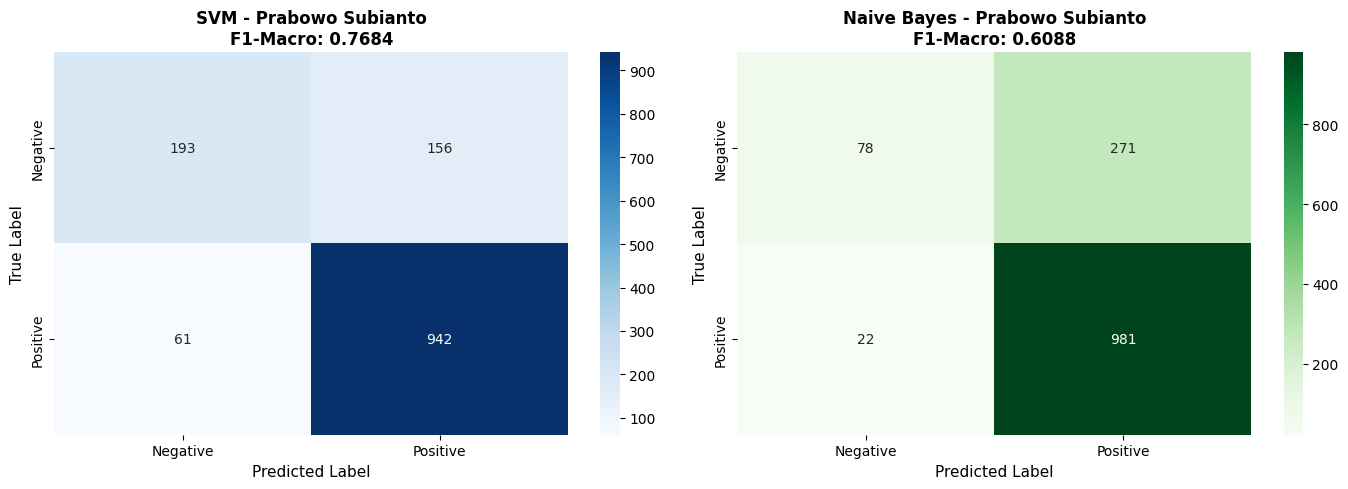

In [25]:
# Plot confusion matrices for all datasets
for results in [anies_results, ganjar_results, prabowo_results]:
    plot_confusion_matrices(results)


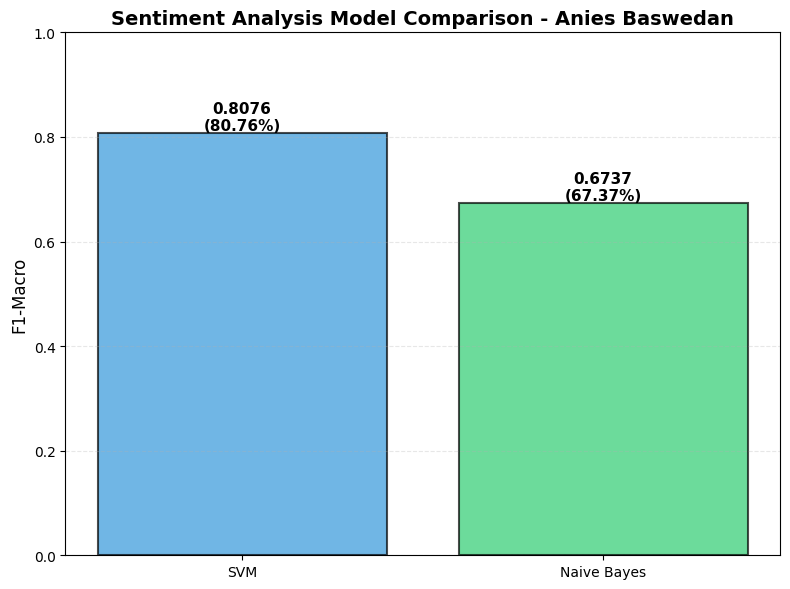

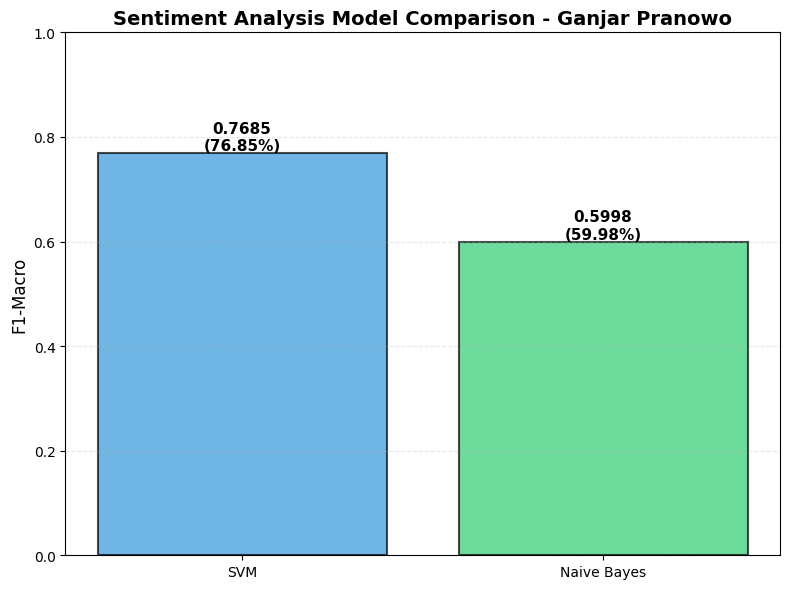

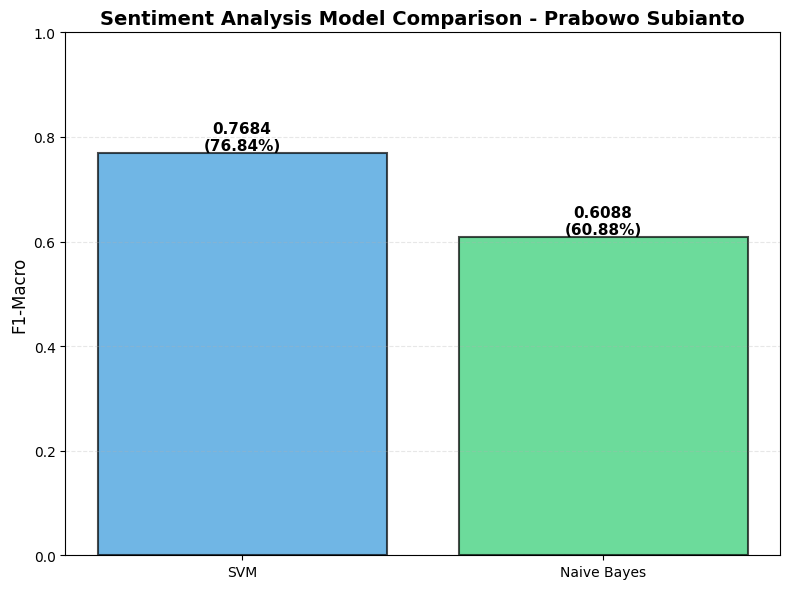

In [26]:
# Plot accuracy comparisons for all datasets
for results in [anies_results, ganjar_results, prabowo_results]:
    plot_accuracy_comparison(results)

## Define Cross-Dataset Comparison Function

In [ ]:
def compare_all_datasets(results_list):
    """Compare results across all datasets."""
    print(f"\n{'='*80}")
    print("CROSS-DATASET COMPARISON")
    print(f"{'='*80}")
    
    # Create comparison DataFrame
    comparison_data = []
    for results in results_list:
        comparison_data.append({
            'Dataset': results['dataset_name'],
            'SVM Accuracy': results['svm_accuracy'],
            'LR Accuracy': results['lr_accuracy'],
            'SVM F1 Macro': results['svm_f1_macro'],
            'LR F1 Macro': results['lr_f1_macro'],
            'SVM F1 Weighted': results['svm_f1_weighted'],
            'LR F1 Weighted': results['lr_f1_weighted'],
            'Best Model': 'SVM' if results['svm_f1_macro'] > results['lr_f1_macro'] else 'Logistic Regression'
        })
    
    comparison_df = pd.DataFrame(comparison_data)
    print("\nModel Performance Comparison:")
    print(comparison_df.to_string(index=False))
    
    # Visualize comparison
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    datasets = [r['dataset_name'] for r in results_list]
    x = np.arange(len(datasets))
    width = 0.35
    
    # Accuracy comparison
    svm_accs = [r['svm_accuracy'] for r in results_list]
    lr_accs = [r['lr_accuracy'] for r in results_list]
    axes[0, 0].bar(x - width/2, svm_accs, width, label='SVM', color='#3498db', alpha=0.7)
    axes[0, 0].bar(x + width/2, lr_accs, width, label='Logistic Regression', color='#e67e22', alpha=0.7)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].set_title('Accuracy Comparison Across Datasets', fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(datasets, rotation=15, ha='right')
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    axes[0, 0].set_ylim([0, 1])
    
    # F1 Macro comparison
    svm_f1_macro = [r['svm_f1_macro'] for r in results_list]
    lr_f1_macro = [r['lr_f1_macro'] for r in results_list]
    axes[0, 1].bar(x - width/2, svm_f1_macro, width, label='SVM', color='#3498db', alpha=0.7)
    axes[0, 1].bar(x + width/2, lr_f1_macro, width, label='Logistic Regression', color='#e67e22', alpha=0.7)
    axes[0, 1].set_ylabel('F1 Score (Macro)', fontsize=12)
    axes[0, 1].set_title('F1 Macro Score Comparison', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(datasets, rotation=15, ha='right')
    axes[0, 1].legend()
    axes[0, 1].grid(axis='y', alpha=0.3)
    axes[0, 1].set_ylim([0, 1])
    
    # F1 Weighted comparison
    svm_f1_weighted = [r['svm_f1_weighted'] for r in results_list]
    lr_f1_weighted = [r['lr_f1_weighted'] for r in results_list]
    axes[1, 0].bar(x - width/2, svm_f1_weighted, width, label='SVM', color='#3498db', alpha=0.7)
    axes[1, 0].bar(x + width/2, lr_f1_weighted, width, label='Logistic Regression', color='#e67e22', alpha=0.7)
    axes[1, 0].set_ylabel('F1 Score (Weighted)', fontsize=12)
    axes[1, 0].set_title('F1 Weighted Score Comparison', fontsize=14, fontweight='bold')
    axes[1, 0].set_xticks(x)
    axes[1, 0].set_xticklabels(datasets, rotation=15, ha='right')
    axes[1, 0].legend()
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].set_ylim([0, 1])
    
    # Best model summary
    best_models = [r['Best Model'] for r in comparison_data]
    model_counts = pd.Series(best_models).value_counts()
    axes[1, 1].bar(model_counts.index, model_counts.values, color=['#3498db', '#e67e22'], alpha=0.7)
    axes[1, 1].set_ylabel('Number of Datasets', fontsize=12)
    axes[1, 1].set_title('Best Model by Dataset (Based on F1 Macro)', fontsize=14, fontweight='bold')
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return comparison_df


## Comparison between 3 Candidate


CROSS-DATASET COMPARISON

Model Performance Comparison:
         Dataset  SVM Accuracy  NB Accuracy  SVM F1 Macro  NB F1 Macro  SVM F1 Weighted  NB F1 Weighted Best Model
  Anies Baswedan      0.828910     0.745906      0.807551     0.673722         0.827571        0.721643        SVM
  Ganjar Pranowo      0.870536     0.816964      0.768497     0.599843         0.858479        0.772412        SVM
Prabowo Subianto      0.839497     0.783284      0.768424     0.608753         0.830482        0.735157        SVM


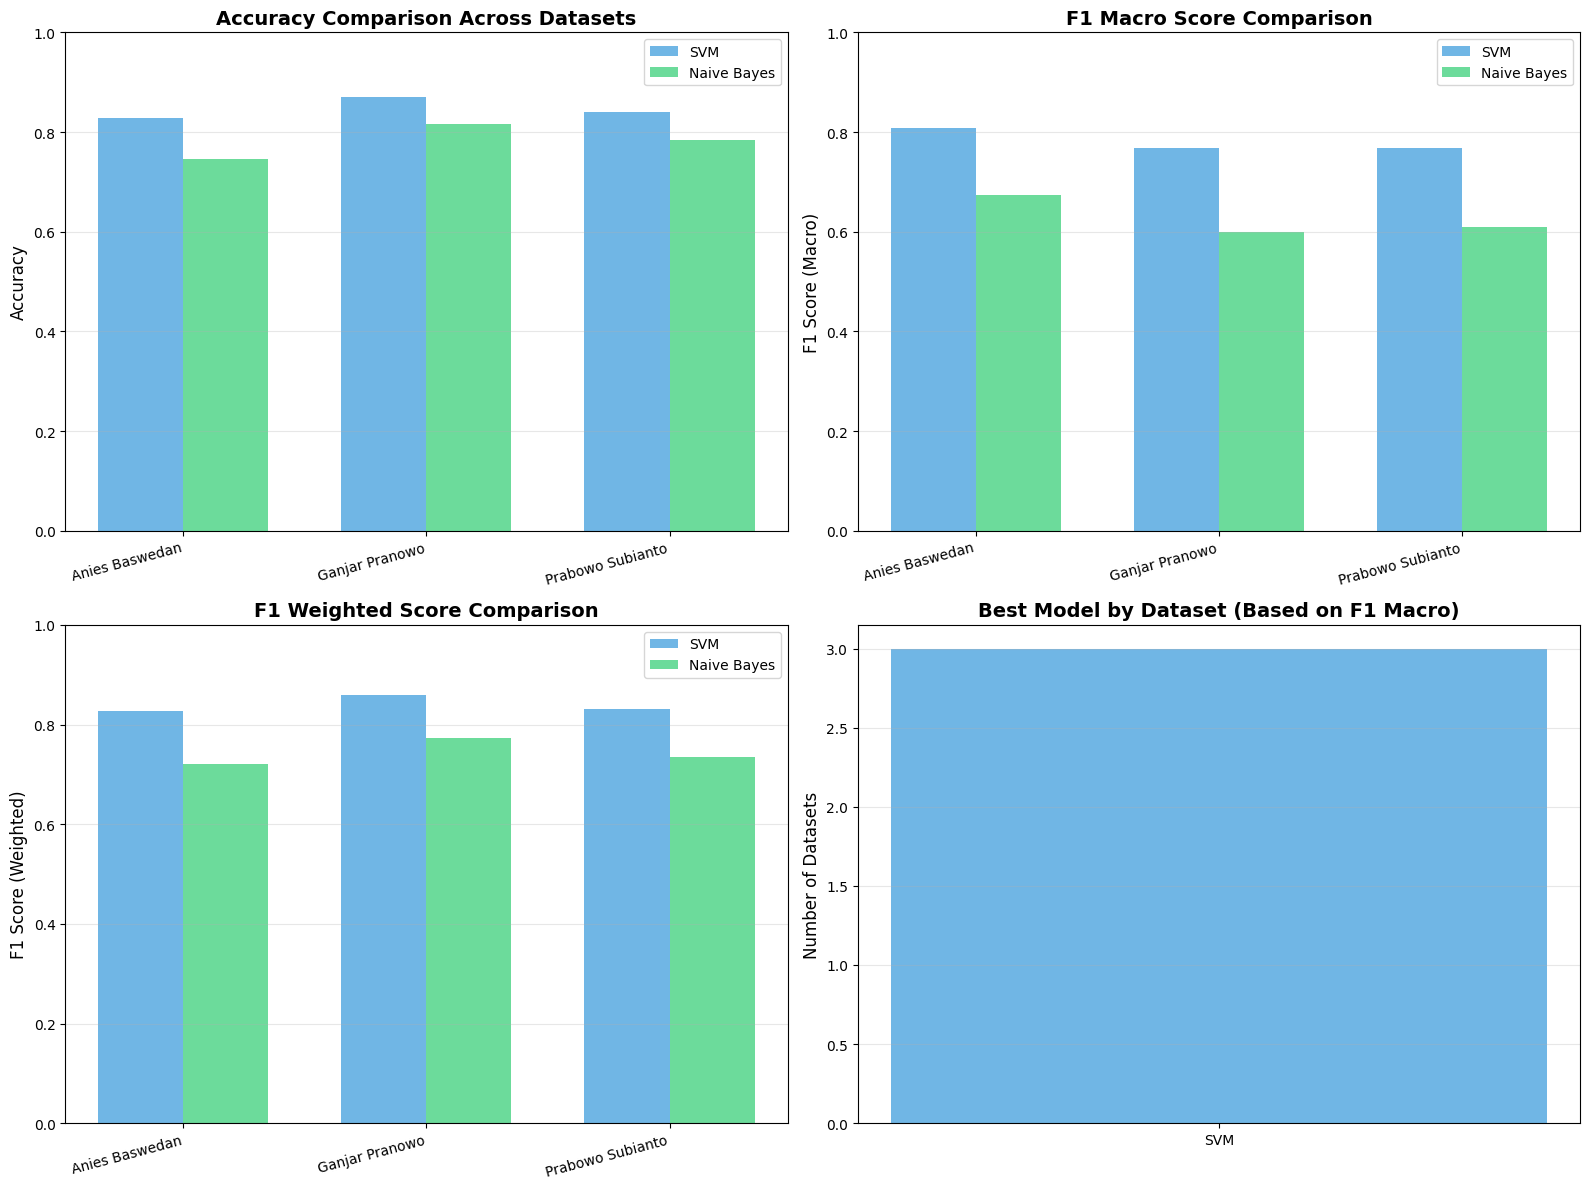

In [ ]:
# Compare all datasets
comparison_df = compare_all_datasets([anies_results, ganjar_results, prabowo_results])

# WordCloud

In [ ]:
# Stopwords List
custom_stopwords = {
    'anies', 'baswedan', 'ganjar', 'pranowo', 'prabowo', 'subianto', 
    'jokowi', 'president', 'presidential', 'candidate', 'election', 
    'republic', 'indonesia', 'mr', 's', 'will', 'become', 'support', 
    'continue', 'people','still', 'good', 'rt', 'gt', 'lt', 'say', 'reward', 'rewarded', 
    'time', 'make', 'one', 'info', 'get', 'must', 'know', 'let', 'really',
    'said', 'even', 'who', 'is','we', 'that', 'this', 'time', 'quota', 'happy',
    'birthday', 'to', 'held', 'held', 'campaign', 'indonesian', 'rasyid','country','gangar','n','t'
}

# Candidate list
candidates = [
    ("Anies Baswedan", anies_df),
    ("Ganjar Pranowo", ganjar_df),
    ("Prabowo Subianto", prabowo_df)
]

# Helper: join tokens, remove stopwords
def join_and_filter(tokens):
    tokens = eval(tokens) if isinstance(tokens, str) else tokens
    return " ".join([t for t in tokens if t not in custom_stopwords])

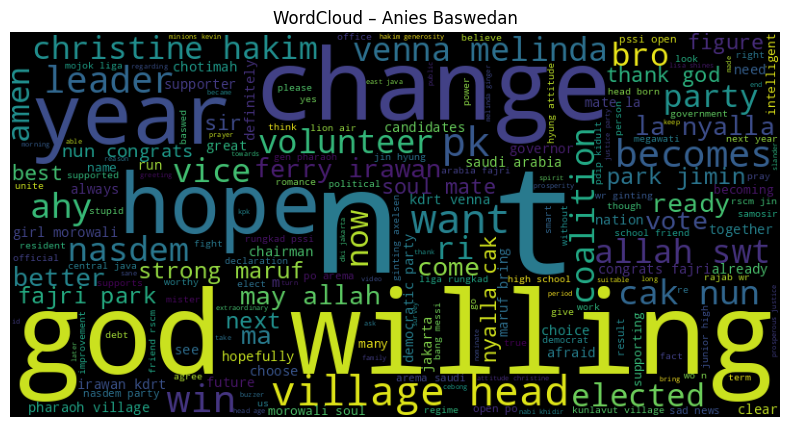

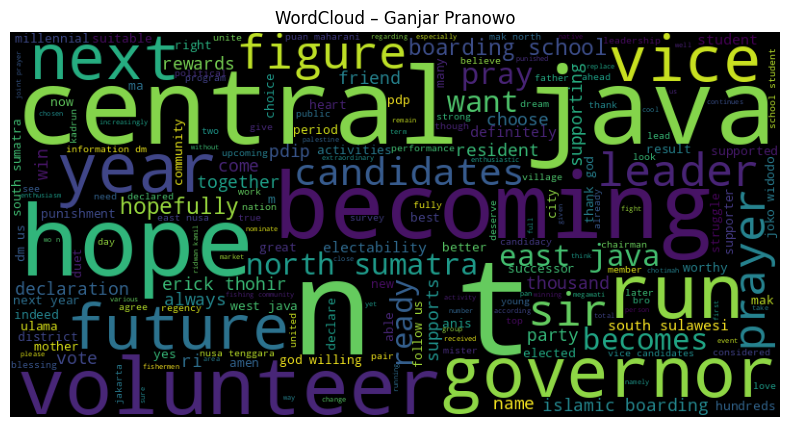

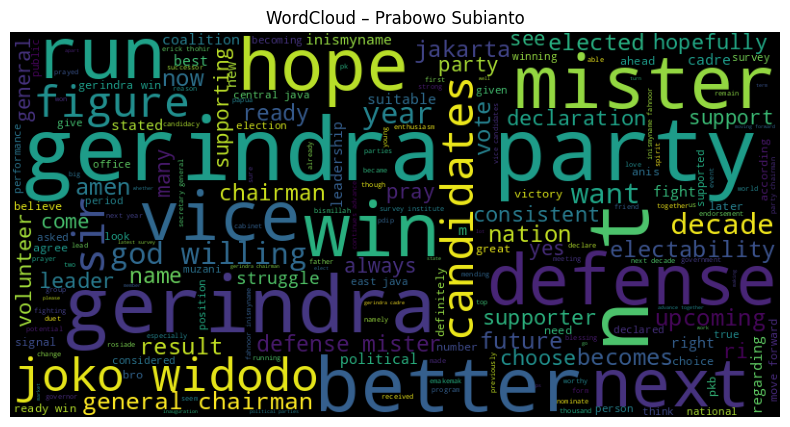

In [ ]:
for name, df in candidates:
    text = df['tweet_tokens_stemmed'].apply(join_and_filter).str.cat(sep=" ")

    wc = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"WordCloud – {name}")
    plt.show()


=== Anies Baswedan ===


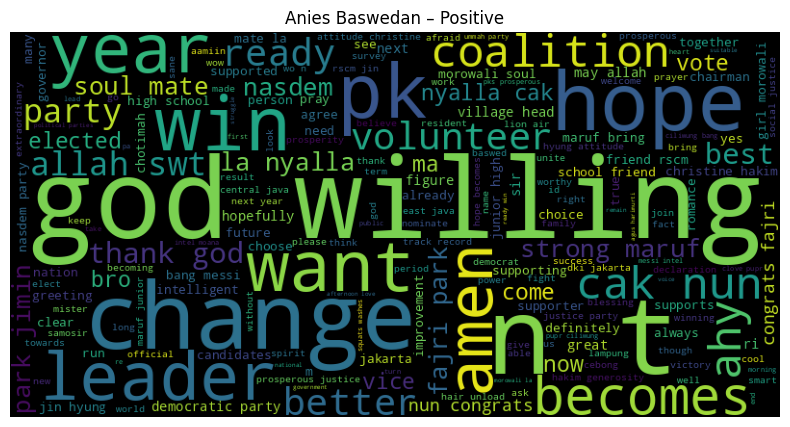

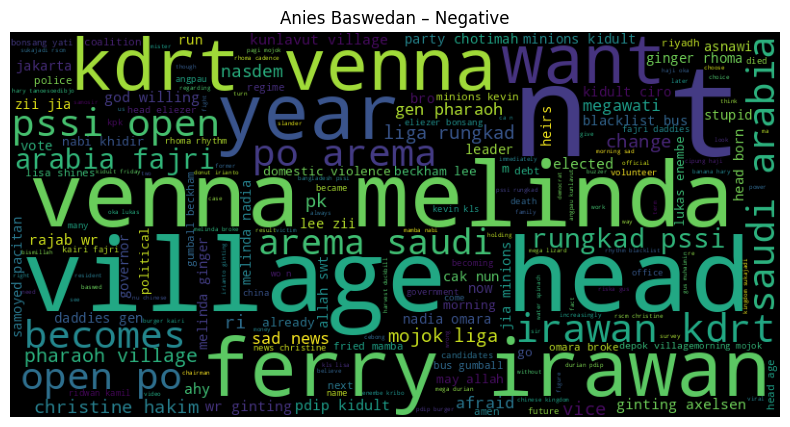

=== Ganjar Pranowo ===


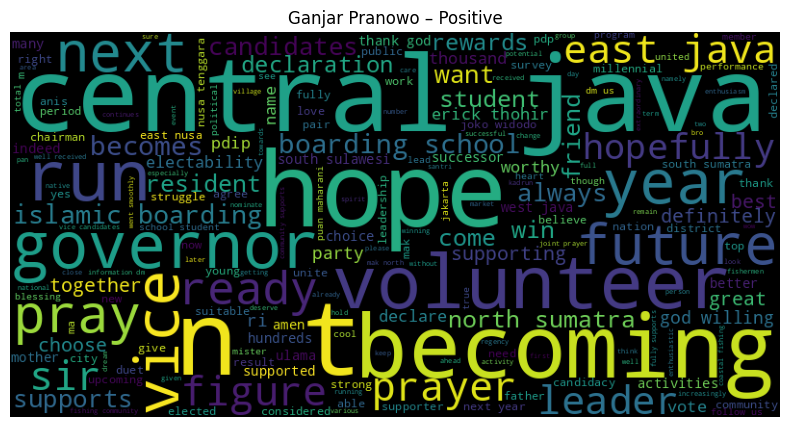

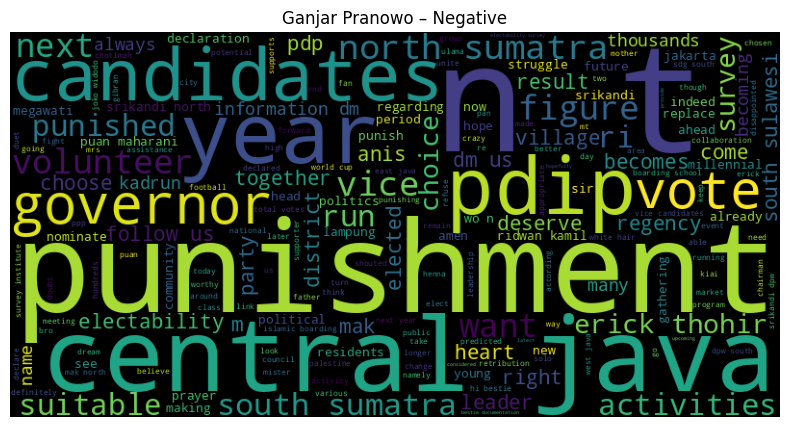

=== Prabowo Subianto ===


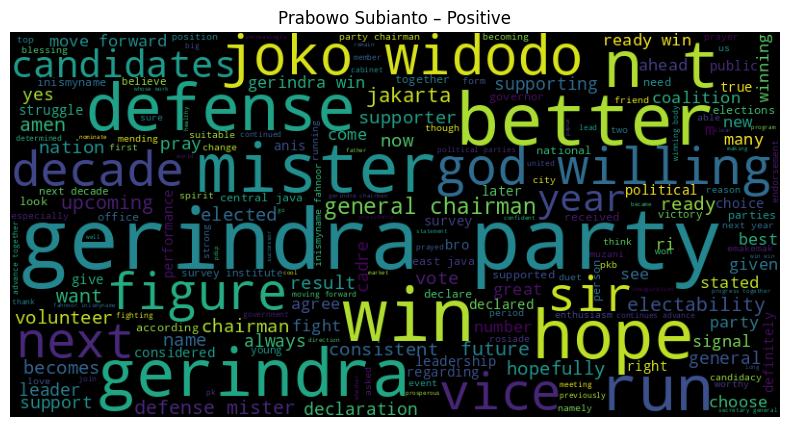

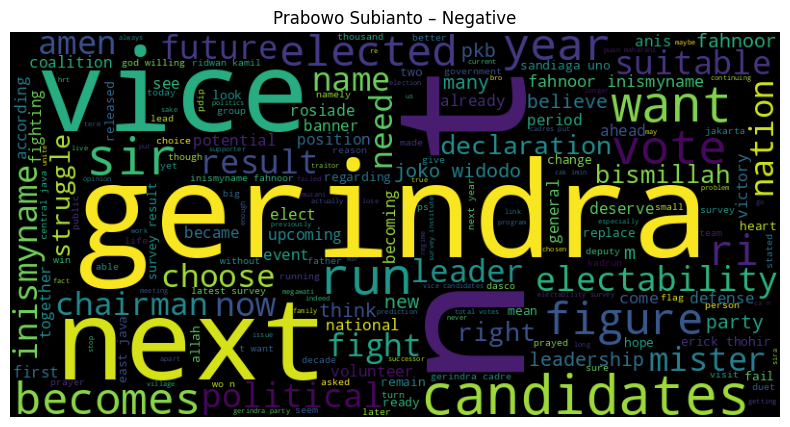

In [ ]:
for name, df in candidates:

    print(f"=== {name} ===")

    for cls in df['label'].unique():
        subset = df[df['label'] == cls]

        if subset.empty:
            continue

        text = subset['tweet_tokens_stemmed'].apply(join_and_filter).str.cat(sep=" ")

        wc = WordCloud(width=800, height=400).generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wc)
        plt.axis("off")
        plt.title(f"{name} – {cls}")
        plt.show()
